# Machine Learning Foundation

## Section 1, Part c: EDA Lab


## Introduction

Estaremos usando o conjunto de dados iris para este tutorial. Este é um conjunto de dados bem conhecido que contém espécies de `iris` e medidas de sépala e pétala. Os dados que usaremos estão em um arquivo chamado iris_data.csv, encontrado no diretório data.

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import os
import numpy as np
import pandas as pd

## Question 1

Carregue os dados do arquivo usando as técnicas aprendidas hoje. Examine-os.

Determine o seguinte:
* O número de pontos de dados (linhas). (Dica: verifique o atributo `.shape` do dataframe.)

* Os nomes das colunas. (Dica: verifique o atributo .columns do dataframe.)

* Os tipos de dados de cada coluna. (Dica: verifique o atributo .dtypes do dataframe.)


In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
### BEGIN SOLUTION
# Number of rows
# print(data.shape[0])

# Column names
# print(data.columns.tolist())

# Data types
print(data.dtypes)
### END SOLUTION

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine os nomes das espécies e observe que todos começam com 'Iris-'. Remova esta parte do nome para que o nome da espécie seja mais curto.

*Dica:*  Existem várias maneiras de fazer isso, mas você pode usar tanto o [métodos de processamento de strings](http://pandas.pydata.org/pandas-docs/stable/text.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [22]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
### BEGIN SOLUTION
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine o seguinte:
* O número de cada espécie presente.(*Dica:* 
Confira a série metodo `.value_counts`.)
* A média, mediana e quantis e intervalos (max-min) para cada medida de pétala e sépala.


Dica: para a última pergunta, o método .describe possui a mediana, mas não é chamada de mediana. É o quantil 50%. .describe não possui o intervalo, e para obtê-lo, você precisará criar uma nova entrada na tabela .describe, que é max - min.


In [15]:
### BEGIN SOLUTION
# One way to count each species
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
stats_df = data.describe()
stats_df.loc['ranges'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
ranges,3.600000,2.400000,5.900000,2.400000


In [16]:
# Select just the rows desired from the 'describe' method and add in the 'median'

stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calcule o seguinte para ***cada espécie*** em um dataframe separado:

* A média de cada medida (comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala).
* A mediana de cada uma dessas medidas.

**Dica:** você pode querer usar o Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para agrupar por espécie antes de calcular a estatística.


Se você terminar ambos, tente calcular ambas as estatísticas (média e mediana) em uma única tabela (ou seja, com uma única chamada de groupby). Consulte a seção da documentação do Pandas sobre [aplicando múltiplas funções de uma vez.](http://pandas.pydata.org/pandas-docs/stable/groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01#applying-multiple-functions-at-once) for a hint.


In [8]:
### BEGIN SOLUTION
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [20]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
#data.groupby('species').agg([np.mean, np.median])   passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [22]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Faça um gráfico de dispersão de `sepal_length` vs `sepal_width` usando o Matplotlib. Rotule os eixos e dê ao gráfico um título.

In [27]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
%matplotlib inline

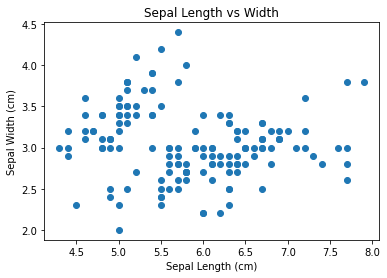

In [28]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');
### END SOLUTION

## Question 6


Faça um histograma de uma das quatro características. Rotule os eixos e dê um título apropriado. 


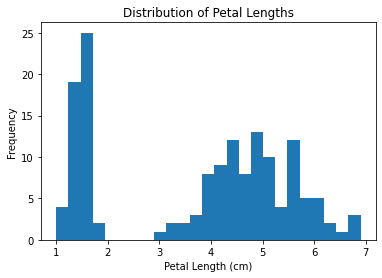

In [29]:
### BEGIN SOLUTION
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

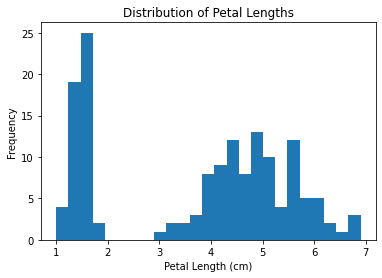

In [30]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');
### END SOLUTION

## Question 7

Agora crie um único gráfico com histogramas para cada característica (petal_width, petal_length, sepal_width, sepal_length) sobrepostos. Se tiver tempo, em seguida, tente criar quatro gráficos de histograma individuais em uma única figura, onde cada gráfico contém uma característica.

Para algumas dicas sobre como fazer isso com os métodos de plotagem do Pandas, confira a [guia de visualização](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for Pandas.


In [4]:
!pip install seaborn



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 88.1 kB/s eta 0:00:00a 0:00:01


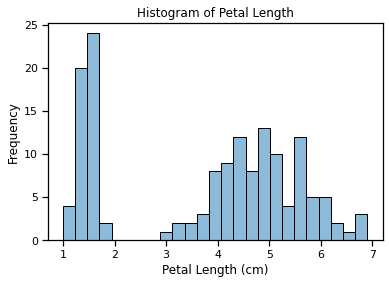

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados iris
data = sns.load_dataset('iris')

# Plotar um histograma do comprimento da pétala
sns.histplot(data=data, x='petal_length', bins=25, alpha=0.5)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()


/tmp/ipykernel_78341/2053221248.py:6: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/tmp/ipykernel_78341/2053221248.py:9: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


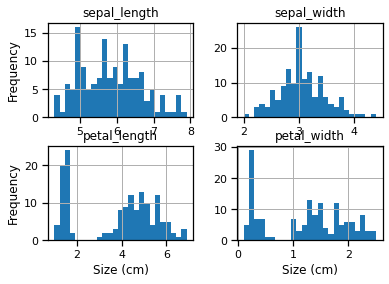

In [7]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

## Question 8


Para fazer um boxplot de cada medida da pétala e da sépala usando o Pandas, você pode usar o método boxplot do Pandas. Aqui está um exemplo básico de como você pode fazer isso:[Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01#visualization-box).


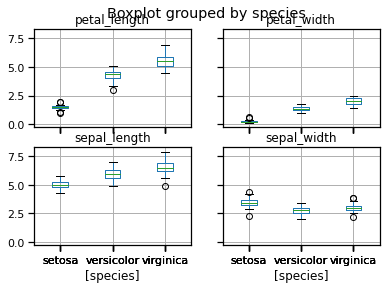

In [10]:
### BEGIN SOLUTION
# Here we have four separate plots
data.boxplot(by='species');
### END SOLUTION

## Question 9

Agora, faça um único boxplot onde as características são separadas no eixo x e as espécies são coloridas com tons diferentes.

Dica: você pode querer verificar a documentação para boxplots do Seaborn.

Também observe que o Seaborn é muito exigente em relação ao formato dos dados - para este gráfico funcionar, o dataframe de entrada precisará ser manipulado de forma que cada linha contenha um único ponto de dados (uma espécie, um tipo de medida e o valor da medida). Confira o método stack do Pandas como ponto de partida.

Here is an example of a data format that will work:

|   | species | measurement  | size | alex  |
| - | ------- | ------------ | ---- | ----- |
| 0	| setosa  | sepal_length | 5.1  |       |
| 1	| setosa  | sepal_width  | 3.5  |       |


In [11]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


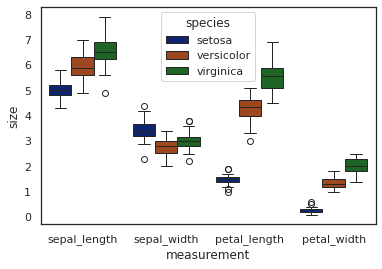

In [12]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) with Seaborn to examine the correlation between each of the measurements.


Dica: Este gráfico pode parecer complicado, mas na verdade é apenas uma única linha de código. Esta é a potência do Seaborn e do plot de dataframes! Consulte as notas da aula para referência.


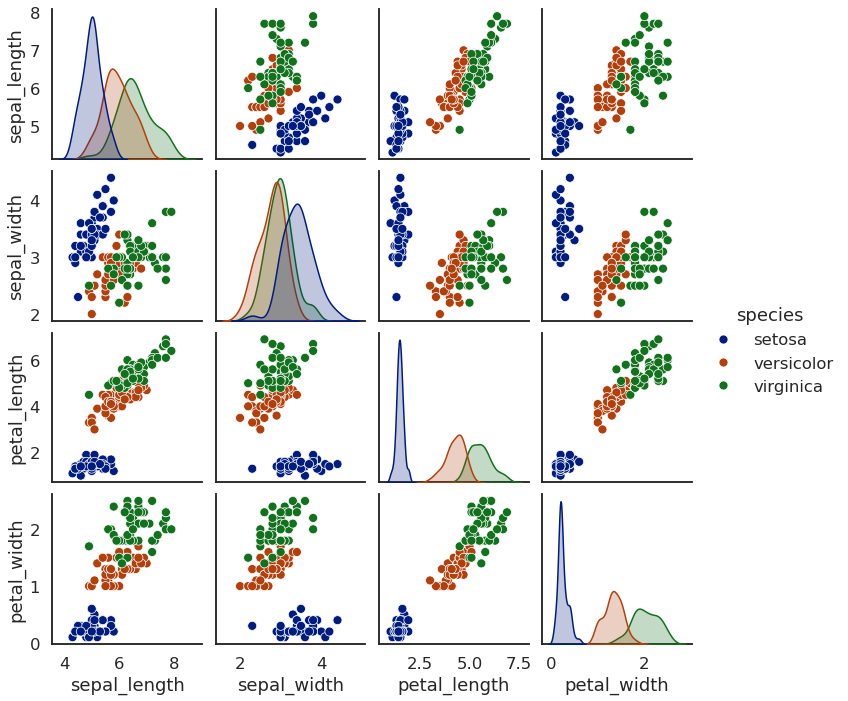

In [13]:
### BEGIN SOLUTION
sns.set_context('talk')
sns.pairplot(data, hue='species');
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation
